# 第4回課題

## 課題1 lucky_array
難なくできました。

In [16]:
import math

def digit_sum(n):
    figure_length = math.floor(math.log10(n)) + 1
    sum = 0
    a=[]
    for i in range(figure_length):
        a.append( n % 10)
        #この時点でnの(i+1)桁目の数がa[i]に入れられた
        n = n // 10
        #この時点でnの(i+2)桁目の数字が1桁目になった
        sum += a[i]
        #この時点でa[i](nの(i+1)桁目の数)がsumに加えられて、sumはa[0]~a[i]の和になった
    return sum

def lucky_array(n):
    a = [False for i in range(n)]
    for i in range(1,n):
        if i % 7 == 0 or digit_sum(i) %7 == 0:
            a[i] = True
    return a


## 課題2 prime_array
難なくできました。


In [4]:
def select_index(a):
    b = []
    for i in range(len(a)):
        if a[i] == True:
            b.append(i)
    return b

def prime_array(n):
    a = [True for i in range(n)]
    a[0] = False
    a[1] = False
    
    for i in range(2,math.floor(math.sqrt(n))):
        if a[i] == True:
            for j in range(i+1,n):
                if j % i ==0:
                    a[j] = False
    return select_index(a)


# 課題3 extend_sum
  最後から2番目の行にある
  b[len(a)][len(a[0])] = rsum(b,len(a))
  で、rsum(a, len(a))と書いてエラーが出ており、「aには行 [len(a)] がない）ということにきづ久野にすごく時間がかかりました。

In [5]:
# 横の和
def rsum(a,r):
    rsum = 0
    for c in range(len(a[r])):
        rsum += a[r][c]
    return rsum

#縦の和
def vsum(a,c):
    vsum = 0
    for r in range(len(a)):
        vsum += a[r][c]
    return vsum

# 二次元配列
def make2d(height,width):
    a = [[0 for _ in range(width)] for _ in range(height)]
    return a

# 2倍
def matrix_double(a):
    b = make2d(len(a),len(a[0]))
    for r in range(len(a)):
        for c in range(len(a[0])):
            b[r][c] = a[r][c] * 2
    return b
    

def extend_sum(a):
    b = make2d(len(a)+1, len(a[0])+1)
    for i in range(len(a)):
        for j in range(len(a[0])):
            b[i][j] = a[i][j]
    
    for i in range(len(a[0])):
        b[len(a)][i] = vsum(a,i)
    
    for i in range(len(a)):
        b[i][len(a[0])] = rsum(a,i)
    
    b[len(a)][len(a[0])] = rsum(b,len(a))
    
    return b

In [6]:
a = [[1,2,3],[10,20,30]]
a

[[1, 2, 3], [10, 20, 30]]

In [7]:
extend_sum(a)

[[1, 2, 3, 6], [10, 20, 30, 60], [11, 22, 33, 66]]

# 課題4 next_field
1行目で、引数fieldと同じ形にしないといけないと思い、next_field = field　とおいてプログラムを動かした結果、うまく行きませんでした。
next_field　を まっさらな状態（全てFalse)に作り直してからやることに気がつき、ようやくできました。(3時間くらいかかりました）


In [8]:
def make_field(height, width, living):
    field = [[False for _ in range(width)] for _ in range(height)]
    for num in range(len(living)):
        field[living[num][0]][living[num][1]] = True
    return field

def inside(field,r,c):
    if 0<= r < len(field) and 0<= c < len(field[0]):
        return True
    else:
        return False

def is_living_cell(field, r,c):
    if inside(field, r, c) == True and field[r][c] == True:
        return 1
    else:
        return 0

def count(field, r, c):
    counter = 0
    
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if (i != 0 or j != 0):
                counter += is_living_cell(field, r + i, c + j)
    return counter

def next_cell_living(living, neighbor_count):
    if living == 1:
        if neighbor_count == 0 or neighbor_count == 1:
            return False
        if neighbor_count == 2:
            return True
        if neighbor_count == 3:
            return True
        if neighbor_count == 4 or neighbor_count == 5 or neighbor_count == 6 or neighbor_count == 7 or neighbor_count == 8:
            return False
    if living == 0:
        if neighbor_count == 0 or neighbor_count == 1:
            return False
        if neighbor_count == 2:
            return False
        if neighbor_count == 3:
            return True
        if neighbor_count == 4 or neighbor_count == 5 or neighbor_count == 6 or neighbor_count == 7 or neighbor_count == 8:
            return False
        
def next_field(field):
    next_field = make_field(len(a), len(a[0]), [])
    # print(field)
    
    for r in range(len(next_field)):
        for c in range(len(next_field[0])):
            next_field[r][c] = next_cell_living(is_living_cell(field, r, c), count(field, r, c))
            #print(field)
    # print(field)
    
    return next_field

In [9]:
a = make_field(5,5,[[0,1],[1,2],[2,0],[2,1],[2,2]])

In [10]:
a

[[False, True, False, False, False],
 [False, False, True, False, False],
 [True, True, True, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]]

In [11]:
next_field(a)

[[False, False, False, False, False],
 [True, False, True, False, False],
 [False, True, True, False, False],
 [False, True, False, False, False],
 [False, False, False, False, False]]

# 課題5 移動型
アニメーションがうまく表示されませんでした。保存もできませんでした。

<IPython.core.display.Javascript object>


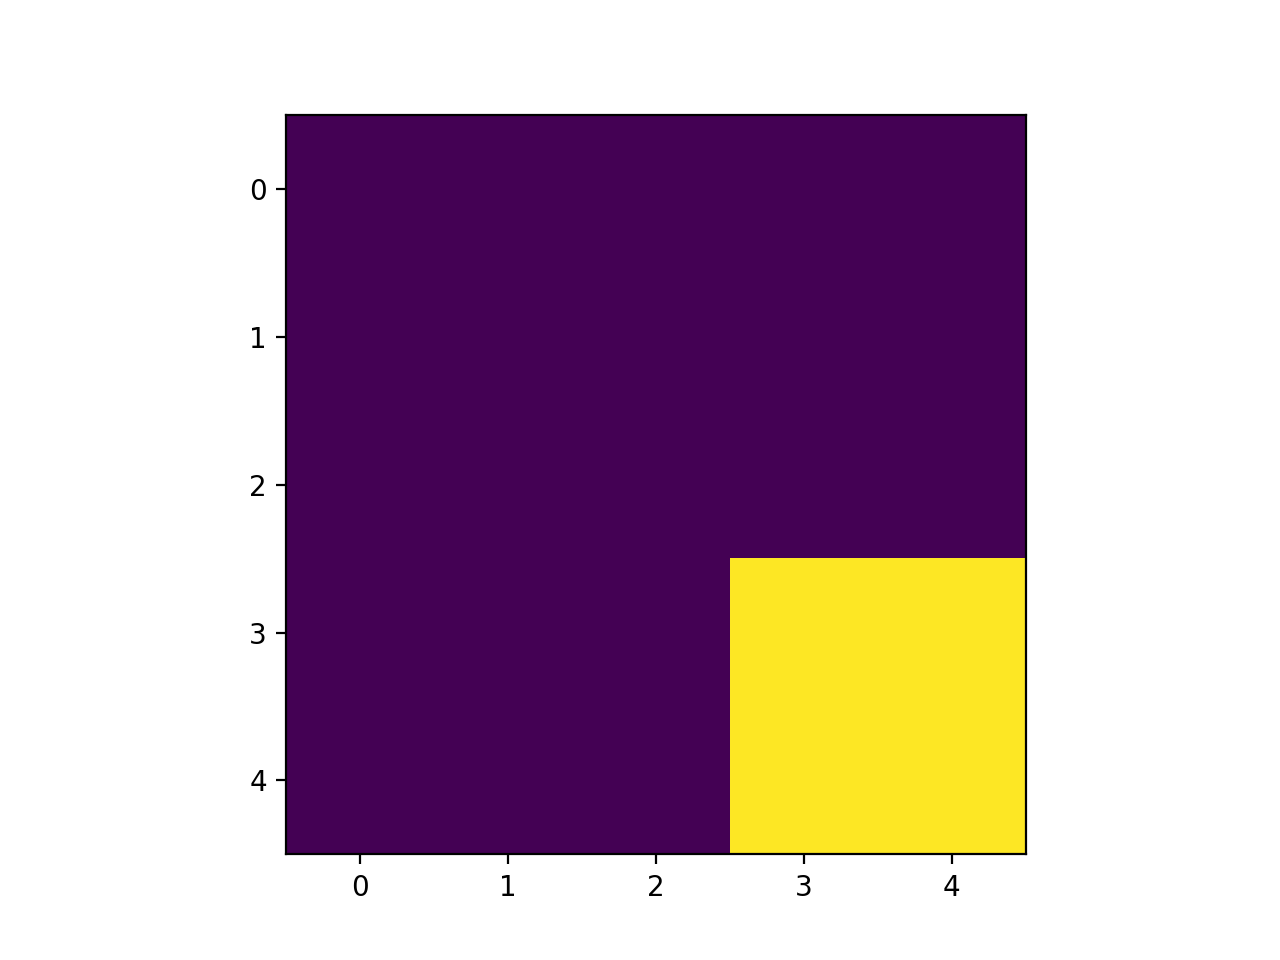

In [12]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def show_animation(initial_field,step):
    a = []
    fig = plt.figure()
    field = initial_field
    for i in range(step):
        a.append([plt.imshow(field)])
        field = next_field(field)
    anim = animation.ArtistAnimation(fig, a, interval=500)
    plt.show()
    return anim

glider = [[0,1],[1,2],[2,0],[2,1],[2,2]]
show_animation(make_field(15,15,glider),50)

<IPython.core.display.Javascript object>


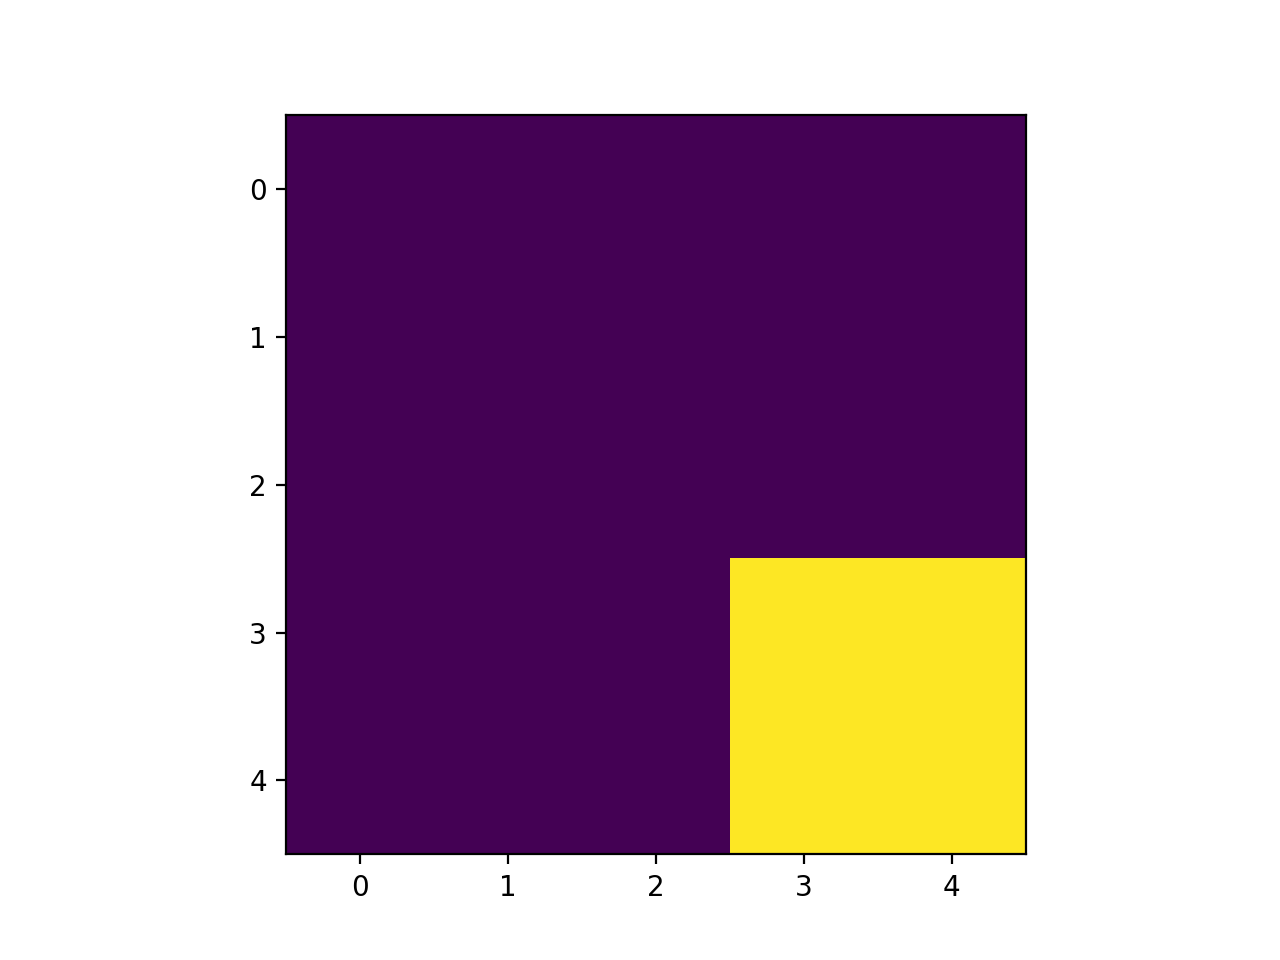

In [13]:
anim = show_animation(make_field(15,15,glider),50)
anim.save("glider.mp4")

## テストコード

In [17]:
import unittest

class TestKadai(unittest.TestCase):
    
    def test_lucky_array(self):
        self.assertEqual(lucky_array(8), [False,False,False,False,False,False,False,True])
        
    def test_lucky_array(self):
        lucky_numbers = [False for _ in range(30)]
        lucky_numbers[7] = True
        lucky_numbers[14] = True
        lucky_numbers[21] = True
        lucky_numbers[28] = True
        lucky_numbers[16] = True
        lucky_numbers[25] = True

        self.assertEqual(lucky_numbers, lucky_array(30))
        
    def test_prime_array(self):
        self.assertEqual(prime_array(20), [2, 3, 5, 7, 11, 13, 17, 19])
        
    def test_extend_sum(self):
        a = [[1,2,3],[10,20,30]]
        self.assertEqual(extend_sum(a),[[1, 2, 3, 6], [10, 20, 30, 60], [11, 22, 33, 66]] )
        
        
    def test_next_field(self):
        a = make_field(5,5,[[0,1],[1,2],[2,0],[2,1],[2,2]])
        self.assertEqual(next_field(a),[[False, False, False, False, False],
 [True, False, True, False, False],
 [False, True, True, False, False],
 [False, True, False, False, False],
 [False, False, False, False, False]])
        
    def test_game_of_life(self): 
        make_field(1,3, [[0,0], [0,1]])
        self.assertEqual(make_field(1,3, [[0,0], [0,1]]), [[True, True, False]]) 
        self.assertEqual(inside(a, 0, 5), False) 
        
        a2 =make_field(5, 5, [[0,1], [1,2], [2,0], [2,1], [2,2]])
        self.assertEqual(count(a2, 3, 3), 1) 
        self.assertEqual(next_field(a2), [[False, False, False, False, False], [True, False, True, False, False], [False, True, True, False, False], [False, True, False, False, False], [False, False, False, False, False]]) 
    

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.005s

OK
